In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical



Found 7 validated image filenames belonging to 7 classes.
Found 2 validated image filenames belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


1/1 [==============================] - 2s 2s/step - loss: 2.4806 - accuracy: 0.0000e+00 - val_loss: 4.9089 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 731ms/step - loss: 5.9713 - accuracy: 0.1429 - val_loss: 2.0525 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 479ms/step - loss: 2.6249 - accuracy: 0.0000e+00 - val_loss: 1.6159 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 464ms/step - loss: 2.6858 - accuracy: 0.1429 - val_loss: 1.7632 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 459ms/step - loss: 2.3629 - accuracy: 0.2857 - val_loss: 1.8159 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 459ms/step - loss: 2.2775 - accuracy: 0.1429 - val_loss: 1.8485 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 428ms/step - loss: 1.7391 - accuracy: 0.2857 - val_loss: 1.9292 - val_accuracy: 0.5000
Epoch 8/10
1/1

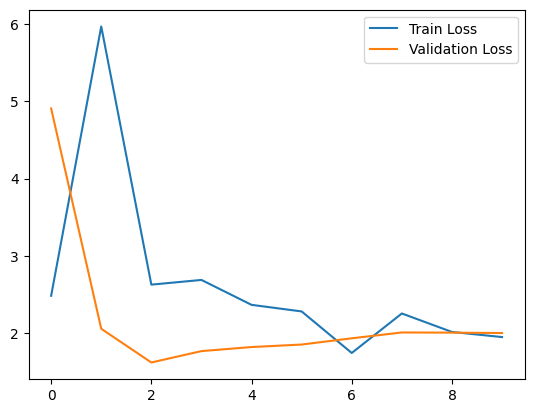

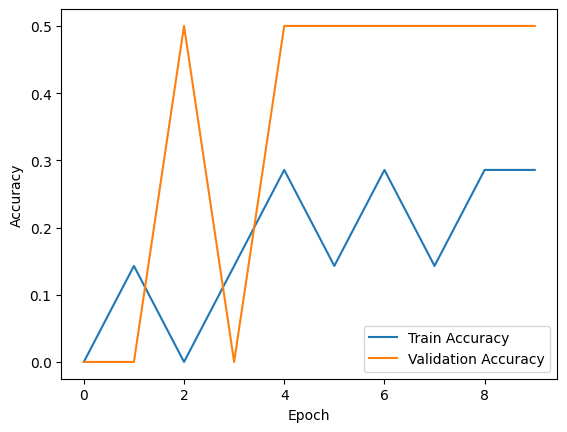

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

labels = pd.read_csv('/content/labels.csv')

image_paths = [
    '/content/00a366d4b4a9bbb6c8a63126697b7656.jpg',
    '/content/00a338a92e4e7bf543340dc849230e75.jpg',
    '/content/00a862390341c5be090dd72bd2bc19ef.jpg',
    '/content/1a0a76e482a7963a008e29977d48aad4.jpg',
    '/content/1a0c7c29748d91638f4aa08d00c0294e.jpg',
    '/content/1a02f01110c17bfde79e92cd0a7b4e64.jpg',
    '/content/2a3b3a4fecb3171df19bed491865c733.jpg',
    '/content/2a4e50e444cedaf3c425d16f06a8d649.jpg',
    '/content/2a5a0a68efa7e768c5af3fe0cb20c9fe.jpg',
    '/content/3a0a6ab81bda742b420274ff6ca3ce0a.jpg'

]

labels_subset = labels[labels['id'].isin(['dhole', 'dingo', 'golden_retriever', 'lakeland_terrier', 'standard_schnauzer', 'entlebucher', 'saluki', 'schipperke', 'german_short-haired_pointer','welsh_springer_spaniel'])]
id_breed_dict = dict(zip(labels_subset['id'], labels_subset['breed']))

image_labels = {
    '/content/00a366d4b4a9bbb6c8a63126697b7656.jpg':'golden_retriever',
    '/content/00a338a92e4e7bf543340dc849230e75.jpg':'dingo',
    '/content/00a862390341c5be090dd72bd2bc19ef.jpg':'standard_schnauzer',
    '/content/1a0a76e482a7963a008e29977d48aad4.jpg':'dhole',
    '/content/1a0c7c29748d91638f4aa08d00c0294e.jpg':'lakeland_terrier',
    '/content/1a02f01110c17bfde79e92cd0a7b4e64.jpg':'entlebucher',
    '/content/2a3b3a4fecb3171df19bed491865c733.jpg':'saluki',
    '/content/2a4e50e444cedaf3c425d16f06a8d649.jpg':'schipperke',
    '/content/2a5a0a68efa7e768c5af3fe0cb20c9fe.jpg':'german_short-haired_pointer',
    '/content/3a0a6ab81bda742b420274ff6ca3ce0a.jpg':'welsh_springer_spaniel'
}

X = image_paths
y = [image_labels[path] for path in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 sınıf için Dense katmanı
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

history = model.fit(
    train_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': X_train, 'breed': y_train}),
                                      x_col='image_path', y_col='breed',
                                      target_size=(128, 128), class_mode='sparse',
                                      batch_size=32, shuffle=True),
    epochs=10,
    validation_data=test_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': X_test, 'breed': y_test}),
                                                     x_col='image_path', y_col='breed',
                                                     target_size=(128, 128), class_mode='sparse',
                                                     batch_size=32, shuffle=False)
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
